In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline 

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from keras.models import Sequential 


In [4]:
fileLocation = 'e:\Documents\College Stuff\PS\Code\Dataset\data_trial.csv'
data = pd.read_csv(fileLocation)
df = pd.DataFrame(data)
df


,date,tempr,ap,ws,rh,blizzard
0,2016-01-01 00:00:00,1.16,980.83,8.27,67.60,0
1,2016-01-01 01:00:00,1.35,980.95,10.91,65.30,0
2,2016-01-01 02:00:00,1.53,981.07,8.59,64.70,0
3,2016-01-01 03:00:00,1.43,981.37,8.18,66.10,0
4,2016-01-01 04:00:00,1.24,981.66,9.19,73.86,0
...,...,...,...,...,...,...
44683,2021-02-04 19:00:00,-4.58,975.76,3.17,60.35,0
44684,2021-02-04 20:00:00,-3.88,975.98,5.95,51.05,0
44685,2021-02-04 21:00:00,-4.50,976.21,7.17,49.89,0
44686,2021-02-04 22:00:00,-4.98,976.44,7.22,50.56,0


<AxesSubplot:>

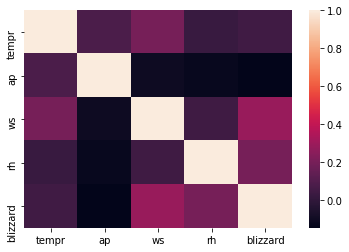

In [102]:
correlationMatrix = df.corr()
sn.heatmap(correlationMatrix)

In [103]:
def attributeDataFrame(predicted_variable, sup_data):
    
    attributeDf = pd.DataFrame()

    for i in range(windowSize, 0, -1):
        attributeDf[predicted_variable +'-'+str(i)] = sup_data[predicted_variable + '-' + str(i)]

    for i in range(futurePredictionSize):
        attributeDf[predicted_variable + '+' + str(i)] = sup_data[predicted_variable + '+' + str(i)]

    return attributeDf

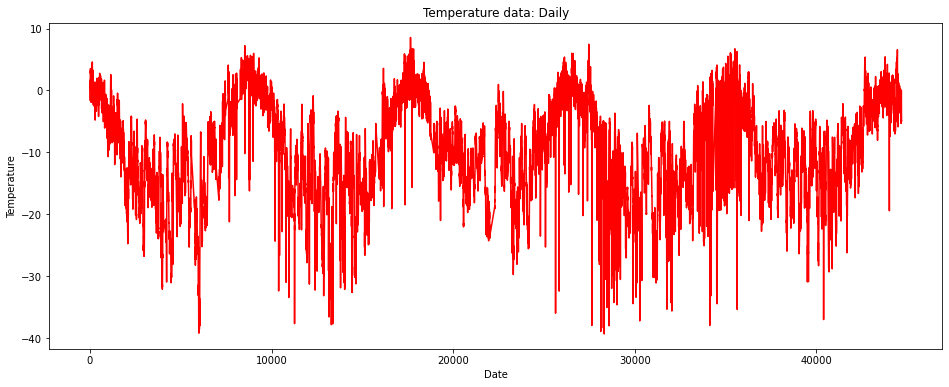

In [104]:
plt.figure(figsize = (16,6))
plt.plot(df.index, df['tempr'], c='r')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature data: Daily')
plt.show()

In [5]:
BlizzardOccured = df.loc[df['blizzard'] == 1]
BlizzardOccured

,date,tempr,ap,ws,rh,blizzard
4833,2016-07-20 09:00:00,-8.97,972.73,30.95,85.22,1
4834,2016-07-20 10:00:00,-8.47,970.38,33.38,88.41,1
4835,2016-07-20 11:00:00,-7.74,968.73,31.82,89.66,1
4836,2016-07-20 12:00:00,-7.21,966.83,37.34,90.34,1
4837,2016-07-20 13:00:00,-7.29,966.71,29.49,90.36,1
...,...,...,...,...,...,...
42166,2020-10-22 22:00:00,-6.18,972.92,30.39,91.51,1
42167,2020-10-22 23:00:00,-6.04,972.71,28.27,91.42,1
42168,2020-10-23 00:00:00,-6.17,972.32,28.24,90.87,1
42169,2020-10-23 01:00:00,-6.03,971.79,28.42,90.95,1


In [106]:
df.loc[df['blizzard'] == 1].index[0]

4833

In [6]:
BlizzardNoccured = df.loc[df['blizzard'] == 0]
BlizzardNoccured 

,date,tempr,ap,ws,rh,blizzard
0,2016-01-01 00:00:00,1.16,980.83,8.27,67.60,0
1,2016-01-01 01:00:00,1.35,980.95,10.91,65.30,0
2,2016-01-01 02:00:00,1.53,981.07,8.59,64.70,0
3,2016-01-01 03:00:00,1.43,981.37,8.18,66.10,0
4,2016-01-01 04:00:00,1.24,981.66,9.19,73.86,0
...,...,...,...,...,...,...
44683,2021-02-04 19:00:00,-4.58,975.76,3.17,60.35,0
44684,2021-02-04 20:00:00,-3.88,975.98,5.95,51.05,0
44685,2021-02-04 21:00:00,-4.50,976.21,7.17,49.89,0
44686,2021-02-04 22:00:00,-4.98,976.44,7.22,50.56,0


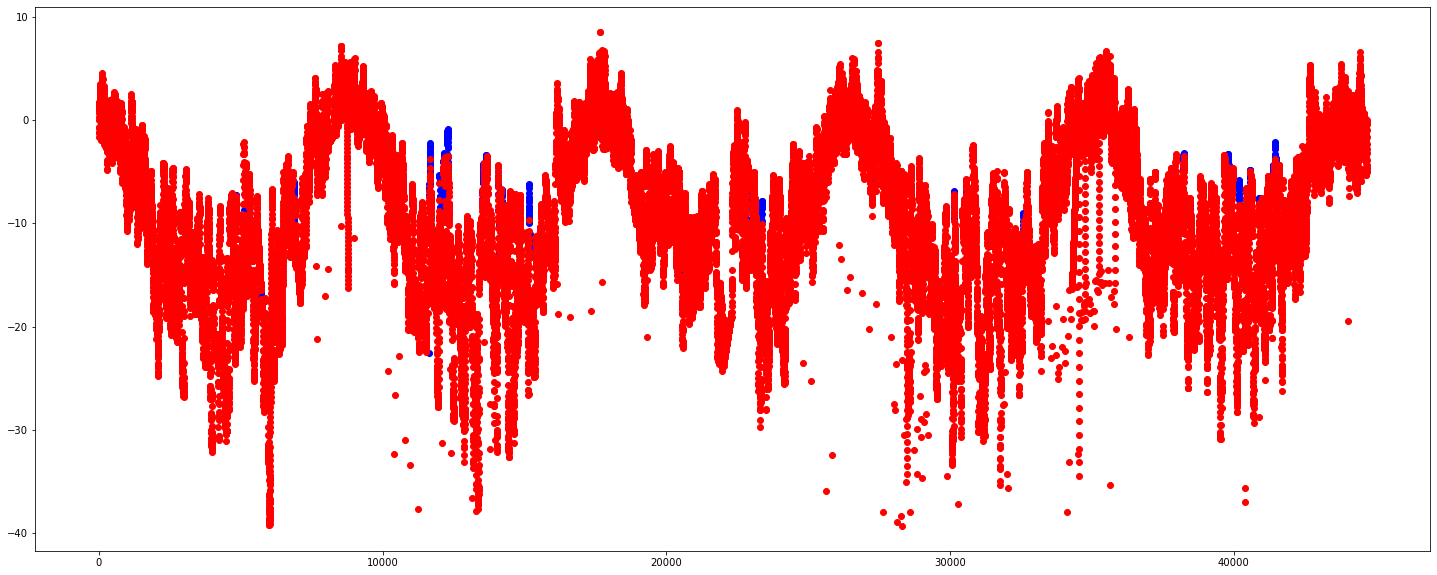

In [11]:
plt.figure(figsize = (25,10))
plt.scatter(BlizzardOccured.index, BlizzardOccured['tempr'], c='b')
plt.scatter(BlizzardNoccured.index, BlizzardNoccured['tempr'], c='r')
plt.show()

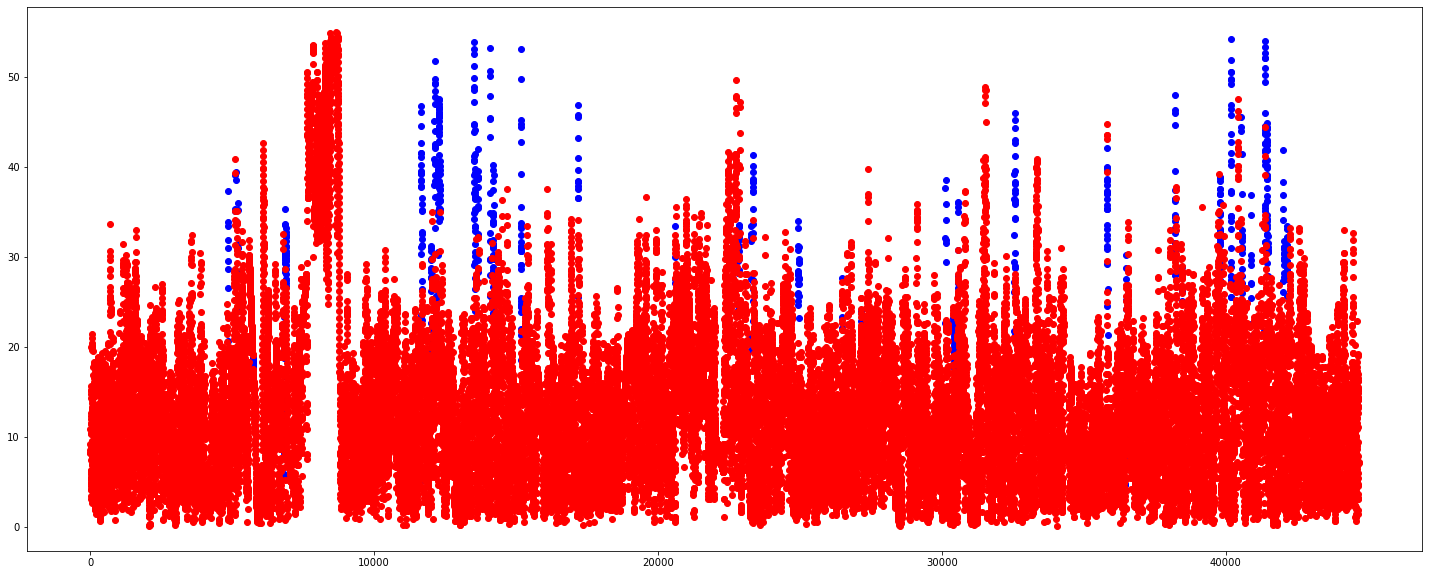

In [12]:
plt.figure(figsize = (25,10))
plt.scatter(BlizzardOccured.index, BlizzardOccured['ws'], c='b')
plt.scatter(BlizzardNoccured.index, BlizzardNoccured['ws'], c='r')
plt.show()

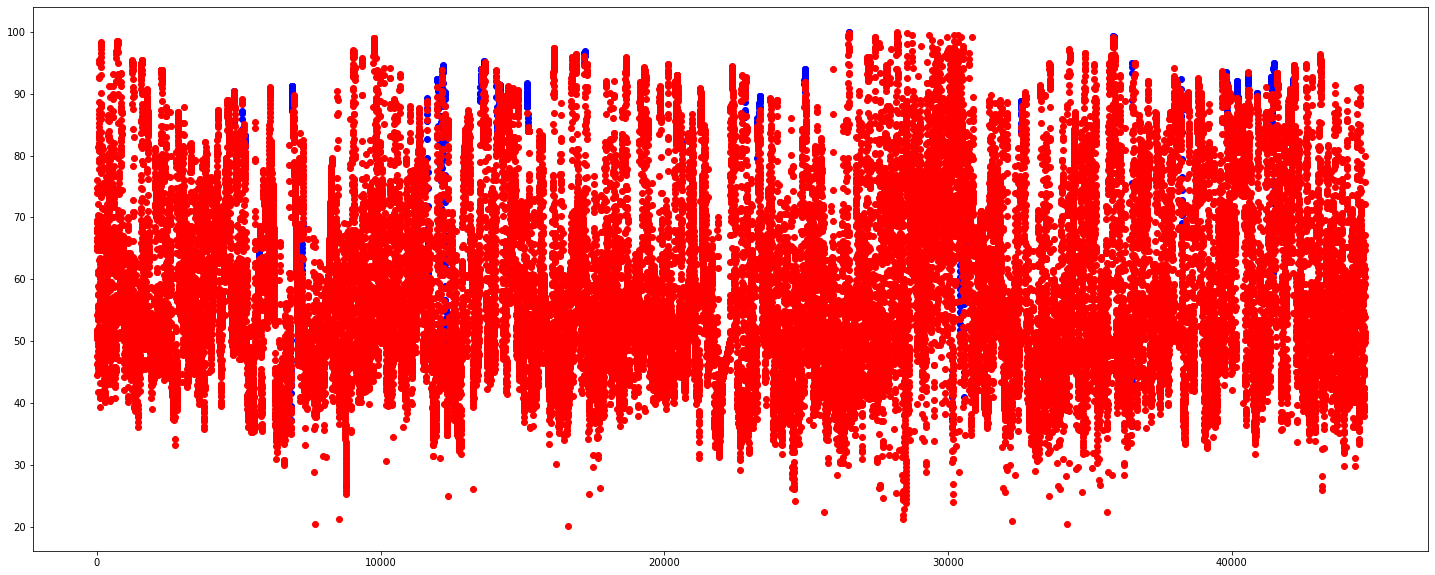

In [13]:
plt.figure(figsize = (25,10))
plt.scatter(BlizzardOccured.index, BlizzardOccured['rh'], c='b')
plt.scatter(BlizzardNoccured.index, BlizzardNoccured['rh'], c='r')
plt.show()

In [109]:
xCols = df.columns[1:-1]
yCols = df.columns[-1]

x_data = df[xCols]
y_data = df[yCols]

x_data.index = df.index
y_data.index = df.index

In [110]:
xTrain, xTest, yTrain, yTest = train_test_split(x_data, y_data, test_size = 0.2, shuffle = False)
scaler = StandardScaler()
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.fit_transform(xTest)

In [111]:
ann = Sequential()
ann.add(Dense(units = 128, activation = 'relu', input_dim = 4))
ann.add(Dense(units = 64, activation = 'relu'))
ann.add(Dense(units = 32, activation = 'relu'))
ann.add(Dense(units = 16, activation = 'relu'))
ann.add(Dense(units = 1, activation = 'sigmoid'))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [112]:
ann.fit(xTrain, yTrain, epochs = 200, batch_size = 20)

Epoch 1/200
1788/1788 [==============================] - 2s 866us/step - loss: 0.0227 - accuracy: 0.9839
Epoch 2/200
1788/1788 [==============================] - 2s 868us/step - loss: 0.0104 - accuracy: 0.9867
Epoch 3/200
1788/1788 [==============================] - 2s 896us/step - loss: 0.0091 - accuracy: 0.9887
Epoch 4/200
1788/1788 [==============================] - 2s 867us/step - loss: 0.0082 - accuracy: 0.9892
Epoch 5/200
1788/1788 [==============================] - 2s 876us/step - loss: 0.0081 - accuracy: 0.9898
Epoch 6/200
1788/1788 [==============================] - 2s 893us/step - loss: 0.0093 - accuracy: 0.9875
Epoch 7/200
1788/1788 [==============================] - 2s 882us/step - loss: 0.0089 - accuracy: 0.9888
Epoch 8/200
1788/1788 [==============================] - 2s 872us/step - loss: 0.0085 - accuracy: 0.9893
Epoch 9/200
1788/1788 [==============================] - 2s 872us/step - loss: 0.0082 - accuracy: 0.9896
Epoch 10/200
1788/1788 [==============================]

1788/1788 [==============================] - 2s 885us/step - loss: 0.0038 - accuracy: 0.9948
Epoch 155/200
1788/1788 [==============================] - 2s 862us/step - loss: 0.0039 - accuracy: 0.9948
Epoch 156/200
1788/1788 [==============================] - 2s 852us/step - loss: 0.0042 - accuracy: 0.9946
Epoch 157/200
1788/1788 [==============================] - 2s 856us/step - loss: 0.0037 - accuracy: 0.9953
Epoch 158/200
1788/1788 [==============================] - 2s 852us/step - loss: 0.0035 - accuracy: 0.9954
Epoch 159/200
1788/1788 [==============================] - 2s 856us/step - loss: 0.0042 - accuracy: 0.9950
Epoch 160/200
1788/1788 [==============================] - 2s 870us/step - loss: 0.0036 - accuracy: 0.9955
Epoch 161/200
1788/1788 [==============================] - 2s 869us/step - loss: 0.0039 - accuracy: 0.9950
Epoch 162/200
1788/1788 [==============================] - 2s 859us/step - loss: 0.0045 - accuracy: 0.9945
Epoch 163/200
1788/1788 [==========================

In [113]:
yPred = ann.predict(xTest)
yPred = [ 1 if y>=0.5 else 0 for y in yPred]

In [114]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(yTest, yPred)
print(cm)

[[8612   51]
 [ 189   86]]


In [65]:
def series_to_supervised(n_in=1, n_out=1, dropnan=True):
    data = pd.read_csv(fileLocation)
    index = 'date'
    df = pd.DataFrame(data)
    df[index] = pd.to_datetime(df[index])
    df.index = df[index]
    df.set_index(index, inplace = True)
    df.drop(columns = ['blizzard'], inplace = True)
    n_vars = 1 if type(data) is list else data.shape[1]
    #df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    return agg


In [67]:
def colNameChange(agg):
      #Rename the columns for better readbility 
    n_in = 10
    n_out = 1
    cols = ['tempr_t','ap_t','ws_t', 'rh_t']
    cols_out = ['tempr_t','ap_t','ws_t', 'rh_t']
    for j in range(1, n_in+1):
        for i in range(1, 5):
            cols.insert(0,cols[-i] + '-'+ str(j))

    for j in range(1, n_out):
        for i in range(0, 4):
            cols.insert(len(cols), cols_out[i] + '+'+ str(j))
    i = 0
    for colName in cols:
        for name_change in cols_out:
            if name_change == colName:
                cols[i] = name_change + '+0'
        i+=1
    print(cols)
    agg.columns = cols

    return agg


sup_data = colNameChange(series_to_supervised(10, 1))
sup_data

['tempr_t-10', 'ap_t-10', 'ws_t-10', 'rh_t-10', 'tempr_t-9', 'ap_t-9', 'ws_t-9', 'rh_t-9', 'tempr_t-8', 'ap_t-8', 'ws_t-8', 'rh_t-8', 'tempr_t-7', 'ap_t-7', 'ws_t-7', 'rh_t-7', 'tempr_t-6', 'ap_t-6', 'ws_t-6', 'rh_t-6', 'tempr_t-5', 'ap_t-5', 'ws_t-5', 'rh_t-5', 'tempr_t-4', 'ap_t-4', 'ws_t-4', 'rh_t-4', 'tempr_t-3', 'ap_t-3', 'ws_t-3', 'rh_t-3', 'tempr_t-2', 'ap_t-2', 'ws_t-2', 'rh_t-2', 'tempr_t-1', 'ap_t-1', 'ws_t-1', 'rh_t-1', 'tempr_t+0', 'ap_t+0', 'ws_t+0', 'rh_t+0']


,tempr_t-10,ap_t-10,ws_t-10,rh_t-10,tempr_t-9,ap_t-9,ws_t-9,rh_t-9,tempr_t-8,ap_t-8,...,ws_t-2,rh_t-2,tempr_t-1,ap_t-1,ws_t-1,rh_t-1,tempr_t+0,ap_t+0,ws_t+0,rh_t+0
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01 10:00:00,1.16,980.83,8.27,67.60,1.35,980.95,10.91,65.30,1.53,981.07,...,8.44,68.19,1.45,983.14,7.42,67.67,1.66,983.20,4.92,65.20
2016-01-01 11:00:00,1.35,980.95,10.91,65.30,1.53,981.07,8.59,64.70,1.43,981.37,...,7.42,67.67,1.66,983.20,4.92,65.20,1.62,983.01,3.49,66.59
2016-01-01 12:00:00,1.53,981.07,8.59,64.70,1.43,981.37,8.18,66.10,1.24,981.66,...,4.92,65.20,1.62,983.01,3.49,66.59,1.38,982.73,4.12,67.76
2016-01-01 13:00:00,1.43,981.37,8.18,66.10,1.24,981.66,9.19,73.86,1.57,981.96,...,3.49,66.59,1.38,982.73,4.12,67.76,1.05,982.20,9.09,74.73
2016-01-01 14:00:00,1.24,981.66,9.19,73.86,1.57,981.96,10.45,68.28,1.48,982.45,...,4.12,67.76,1.05,982.20,9.09,74.73,0.98,981.50,11.49,75.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-04 19:00:00,-0.32,973.89,6.96,57.36,-0.18,974.12,5.47,53.88,-0.32,974.29,...,3.11,61.67,-4.33,975.59,1.94,65.52,-4.58,975.76,3.17,60.35
2021-02-04 20:00:00,-0.18,974.12,5.47,53.88,-0.32,974.29,4.74,59.29,0.01,974.39,...,1.94,65.52,-4.58,975.76,3.17,60.35,-3.88,975.98,5.95,51.05
2021-02-04 21:00:00,-0.32,974.29,4.74,59.29,0.01,974.39,3.09,64.74,-0.97,974.60,...,3.17,60.35,-3.88,975.98,5.95,51.05,-4.50,976.21,7.17,49.89


In [79]:
def shiftData(sup_data, df, n_in, n_out, step):
    trainSize = int(0.8*len(df))
    # trainSize = int(trainingWindow*len(df))
    X_train = []
    y_train =[]
    X_test = []
    y_test = []

    for i in range(0, trainSize+1, 1):
        X_train.append(sup_data.iloc[i,:])
        y_train.append(df.iloc[i+1, -1])

    for i in range(trainSize+1, len(sup_data), 1):
        X_test.append(sup_data.iloc[i,:])
        y_test.append(df.iloc[i+1, -1])

#     X_test.append(attributeDf.iloc[trainSize+1, 0:n_in])
#     y_test.append(attributeDf.iloc[trainSize+1,n_in:n_in+n_out])

    X_test = np.array(X_test)
    y_test = np.array(y_test)
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    return X_train, X_test, y_train, y_test

In [92]:
x_train, x_test, y_train, y_test = shiftData(sup_data, df, 10, 1, 1)

In [93]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [96]:
ann = Sequential()
ann.add(Dense(units = 128, activation = 'relu', input_dim = 44))
ann.add(Dense(units = 64, activation = 'relu'))
ann.add(Dense(units = 32, activation = 'relu'))
ann.add(Dense(units = 16, activation = 'relu'))
ann.add(Dense(units = 1, activation = 'sigmoid'))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [97]:
ann.fit(x_train, y_train, epochs = 200, batch_size = 20)

Epoch 1/200
1788/1788 [==============================] - 3s 1ms/step - loss: 0.0216 - accuracy: 0.9762
Epoch 2/200
1788/1788 [==============================] - 2s 931us/step - loss: 0.0131 - accuracy: 0.9842
Epoch 3/200
1788/1788 [==============================] - 2s 909us/step - loss: 0.0104 - accuracy: 0.9872
Epoch 4/200
1788/1788 [==============================] - 2s 912us/step - loss: 0.0095 - accuracy: 0.9883
Epoch 5/200
1788/1788 [==============================] - 2s 931us/step - loss: 0.0081 - accuracy: 0.9898
Epoch 6/200
1788/1788 [==============================] - 2s 1ms/step - loss: 0.0082 - accuracy: 0.9899
Epoch 7/200
1788/1788 [==============================] - 2s 1ms/step - loss: 0.0079 - accuracy: 0.9896
Epoch 8/200
1788/1788 [==============================] - 2s 1ms/step - loss: 0.0079 - accuracy: 0.9900
Epoch 9/200
1788/1788 [==============================] - 2s 938us/step - loss: 0.0068 - accuracy: 0.9912
Epoch 10/200
1788/1788 [==============================] - 2s 89

1788/1788 [==============================] - 2s 1ms/step - loss: 0.0024 - accuracy: 0.9973
Epoch 156/200
1788/1788 [==============================] - 2s 1ms/step - loss: 0.0023 - accuracy: 0.9974
Epoch 157/200
1788/1788 [==============================] - 2s 1ms/step - loss: 0.0018 - accuracy: 0.9980
Epoch 158/200
1788/1788 [==============================] - 2s 912us/step - loss: 0.0016 - accuracy: 0.9983
Epoch 159/200
1788/1788 [==============================] - 2s 894us/step - loss: 0.0022 - accuracy: 0.9977
Epoch 160/200
1788/1788 [==============================] - 2s 893us/step - loss: 0.0025 - accuracy: 0.9972
Epoch 161/200
1788/1788 [==============================] - 2s 890us/step - loss: 0.0019 - accuracy: 0.9981
Epoch 162/200
1788/1788 [==============================] - 2s 891us/step - loss: 0.0019 - accuracy: 0.9980
Epoch 163/200
1788/1788 [==============================] - 2s 898us/step - loss: 0.0014 - accuracy: 0.9984
Epoch 164/200
1788/1788 [==============================] 

In [98]:
yPred = ann.predict(x_test)
yPred = [ 1 if y>=0.5 else 0 for y in yPred]

In [99]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, yPred)
print(cm)

[[8566   86]
 [ 129  146]]


In [100]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, yPred)

0.9759157611739666